# Statistics Basics

## Central Tendency
Central tendency refers to the measure that identifies the center of a data set, representing a typical or average value. It is an essential concept in statistics, helping summarize data into a single representative value. The three primary measures of central tendency are:
- Mean
- Median
- Mode

Other related concepts include skewness and normal distribution, which describe the shape and symmetry of the data distribution.

### 1. Mean 
The mean, commonly known as the average, is the sum of all data values divided by the total number of values.

#### Use Case:
The mean is commonly used in finance to calculate average returns, in education to find average scores, and more.

#### Formula:
Mean=∑xi/N = frac{sum x_i}{N}
* Where:
    - x_i = individual data values
    - N = total number of data values

#### Example (Theoretical):
Suppose we have the following numbers: 5, 10, 15, 20, 25.

Mean=(5+10+15+20+25)/5= 75/5 = 15

In [6]:
# Calculate the mean
import numpy as np

data = [5, 10, 15, 20, 25, 5]
mean = np.mean(data)
print(f"Mean: {mean}")

Mean: 13.333333333333334


### 2. Median
The median is the middle value of a dataset when the values are arranged in ascending order. If the dataset has an even number of values, the median is the average of the two middle numbers.

#### Use Case:
The median is used in income distribution studies to identify the midpoint of salaries, avoiding distortion by extreme values.

#### Steps to Calculate:
Arrange the data in ascending order.

Find the middle value.

If  is odd, the median is the middle value.

If  is even, the median is the average of the two middle values.

#### Example (Theoretical):

Data: 3, 5, 7, 9, 11

Median: 7 (middle value)

In [7]:
# Calculate the median
median = np.median(data)
print(f"Median: {median}")

Median: 12.5


### 3. Mode
The mode is the value that occurs most frequently in a dataset. There can be one mode, more than one mode (bimodal or multimodal), or no mode if all values occur equally.

#### Use Case:
The mode is widely used in retail to determine the most sold product or size preferences.

#### Example (Theoretical):
Data: 2, 3, 3, 5, 7

Mode: 3

In [8]:
from scipy import stats

# Calculate the mode
mode = stats.mode(data)
print(f"Mode: {mode.mode}")

Mode: 5


### Skewness
Skewness measures the asymmetry of a dataset’s distribution. A dataset can be:
- Symmetric: Skewness = 0
- Positively Skewed: Longer tail on the right (Skewness > 0)
- Negatively Skewed: Longer tail on the left (Skewness < 0)

#### Visualization:
A histogram or boxplot can show skewness.

#### Example (Theoretical):
- Symmetric: Test scores like 50, 60, 70, 80, 90
- Positive Skew: Incomes with a few very high salaries
- Negative Skew: Age of retirement where most retire around 60-65

In [9]:
# Calculate skewness
skewness = stats.skew(data)
print(f"Skewness: {skewness}")

Skewness: 0.2795084971874735


### Normal Distribution
A normal distribution is a symmetric, bell-shaped curve where most data points cluster around the mean. It is defined by two parameters:
- Mean (μ): Central value
- Standard Deviation (σ): Spread of the data

#### Key Properties:
- Approximately 68% of data lies within 1σ of the mean.
- Approximately 95% of data lies within 2σ of the mean.
- Approximately 99.7% of data lies within 3σ of the mean.

#### Visualization:
The bell curve is the most recognizable visualization of a normal distribution.

#### Example (Theoretical):
Heights of people, standardized test scores, etc., often follow a normal distribution

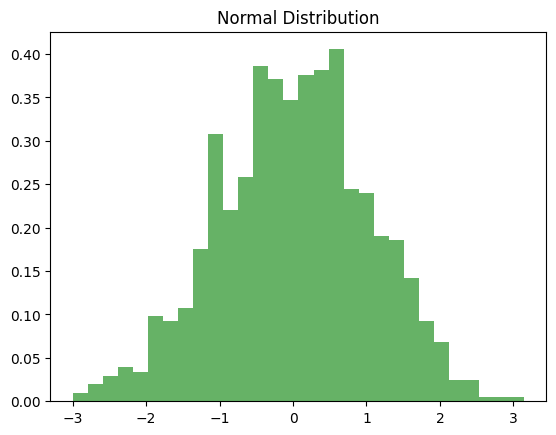

In [10]:
import matplotlib.pyplot as plt

# Generate normal distribution
mu, sigma = 0, 1
s = np.random.normal(mu, sigma, 1000)

# Plot the distribution
plt.hist(s, bins=30, density=True, alpha=0.6, color='g')
plt.title('Normal Distribution')
plt.show()

## Probability Basics

### Calculating Basic Probability

In [11]:
# Import necessary libraries
import random

# Simulating a coin flip
outcomes = ['Heads', 'Tails']
trials = 10000
results = [random.choice(outcomes) for _ in range(trials)]

# Calculate probability
p_heads = results.count('Heads') / trials
p_tails = results.count('Tails') / trials

print(f"P(Heads): {p_heads}")
print(f"P(Tails): {p_tails}")

P(Heads): 0.4989
P(Tails): 0.5011


### Conditional Probability

In [12]:
# Simulating a deck of cards
import itertools

deck = list(itertools.product(['Hearts', 'Diamonds', 'Clubs', 'Spades'], range(1, 14)))

# Event A: Draw a King
# Event B: Draw a face card (J, Q, K)
face_cards = [(suit, rank) for suit, rank in deck if rank in [11, 12, 13]]
kings = [(suit, rank) for suit, rank in deck if rank == 13]

# Conditional Probability
p_king_given_face = len(kings) / len(face_cards)
print(f"P(King | Face card): {p_king_given_face}")

P(King | Face card): 0.3333333333333333


### Visualizing Probability

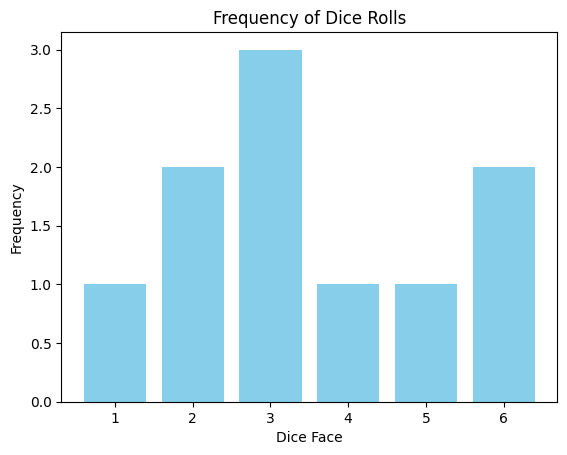

In [21]:
import matplotlib.pyplot as plt

# Simulating dice rolls
rolls = [random.randint(1, 6) for _ in range(10)]
frequencies = {i: rolls.count(i) for i in range(1, 7)}

# Plotting the results
plt.bar(frequencies.keys(), frequencies.values(), color='skyblue')
plt.xlabel('Dice Face')
plt.ylabel('Frequency')
plt.title('Frequency of Dice Rolls')
plt.show()

### Odds Ratio

In [23]:
# Example: Treatment vs Control
odds_treatment = 30 / 20
odds_control = 20 / 30

odds_ratio = odds_treatment / odds_control
print(f"Odds Ratio: {odds_ratio}")

Odds Ratio: 2.25


## Standard Deviation
* Data deviation & distribution
* Variance 

In [24]:
import numpy as np

# Dataset
data = [4, 8, 6]

# Mean
mean = np.mean(data)

# Population Variance
population_variance = np.var(data)

# Sample Variance
sample_variance = np.var(data, ddof=1)

# Population Standard Deviation
population_std_dev = np.std(data)

# Sample Standard Deviation
sample_std_dev = np.std(data, ddof=1)

print("Mean:", mean)
print("Population Variance:", population_variance)
print("Sample Variance:", sample_variance)
print("Population Standard Deviation:", population_std_dev)
print("Sample Standard Deviation:", sample_std_dev)

Mean: 6.0
Population Variance: 2.6666666666666665
Sample Variance: 4.0
Population Standard Deviation: 1.632993161855452
Sample Standard Deviation: 2.0


## Bias variance Trade off

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate dataset
def generate_data(n_samples=100):
    np.random.seed(0)
    X = np.sort(np.random.rand(n_samples, 1) * 10, axis=0)
    y = np.sin(X).ravel() + np.random.normal(0, 0.5, X.shape[0])
    return X, y

X, y = generate_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Degree 1 - Train Error: 0.70, Test Error: 0.63


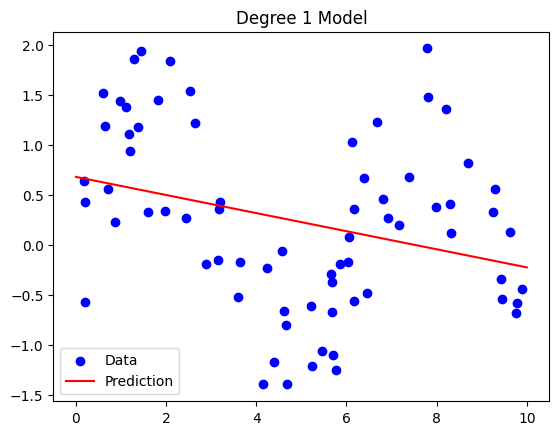

Degree 4 - Train Error: 0.29, Test Error: 0.17


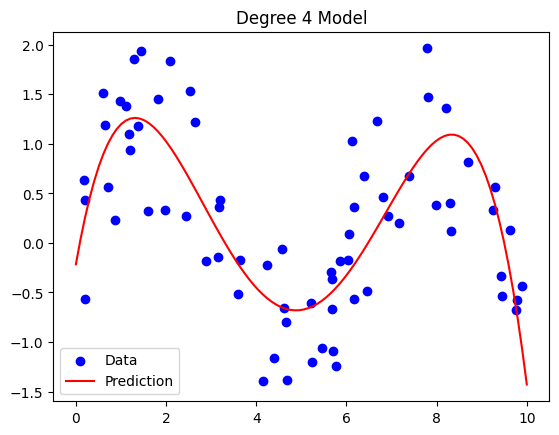

Degree 15 - Train Error: 0.29, Test Error: 0.21


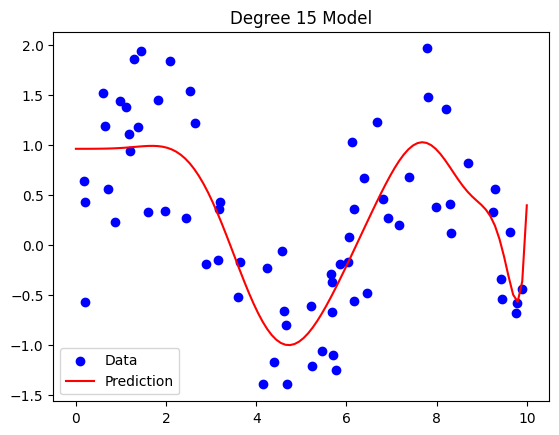

In [14]:
# Helper function to plot predictions
# Correct Helper Function
def plot_predictions(model, poly, X, y, title):
    X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)  # Transform X_plot
    y_plot = model.predict(X_plot_poly)
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X_plot, y_plot, color='red', label='Prediction')
    plt.title(title)
    plt.legend()
    plt.show()


# Fit models with different polynomial degrees
for degree in [1, 4, 15]:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    train_error = mean_squared_error(y_train, model.predict(X_train_poly))
    test_error = mean_squared_error(y_test, model.predict(X_test_poly))

    print(f"Degree {degree} - Train Error: {train_error:.2f}, Test Error: {test_error:.2f}")
    plot_predictions(model, poly, X_train, y_train, f"Degree {degree} Model")

### Observations
- Degree 1 (Underfitting): Straight line that doesn’t capture data trends.
- Degree 4 (Balanced): Captures the sine wave pattern.
- Degree 15 (Overfitting): Fits noise, leading to high variance.

## Distance metrics

### Euclidean Distance

In [ ]:
import math

def euclidean_distance(point1, point2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))

# Example
point_a = (1, 2)
point_b = (4, 6)
print("Euclidean Distance:", euclidean_distance(point_a, point_b))

Euclidean Distance: 5.0


### Manhattan Distance

In [16]:
def manhattan_distance(point1, point2):
    return sum(abs(x - y) for x, y in zip(point1, point2))

# Example
point_a = (1, 2)
point_b = (4, 6)
print("Manhattan Distance:", manhattan_distance(point_a, point_b))

Manhattan Distance: 7


### Comparison Between Euclidean and Manhattan Distance

In [17]:
point_a = (1, 2)
point_b = (4, 6)

print("Euclidean Distance:", euclidean_distance(point_a, point_b))
print("Manhattan Distance:", manhattan_distance(point_a, point_b))

Euclidean Distance: 5.0
Manhattan Distance: 7


### Weighted Distance Metrics

In [18]:
def weighted_euclidean_distance(point1, point2, weights):
    return math.sqrt(sum(w * (x - y) ** 2 for x, y, w in zip(point1, point2, weights)))

# Example
weights = [2, 1]  # Prioritize the first dimension
print("Weighted Euclidean Distance:", weighted_euclidean_distance(point_a, point_b, weights))

Weighted Euclidean Distance: 5.830951894845301


## Outlier analysis 

### Box and Whisker Plot
This code will produce a box plot where 50 appears as an outlier.

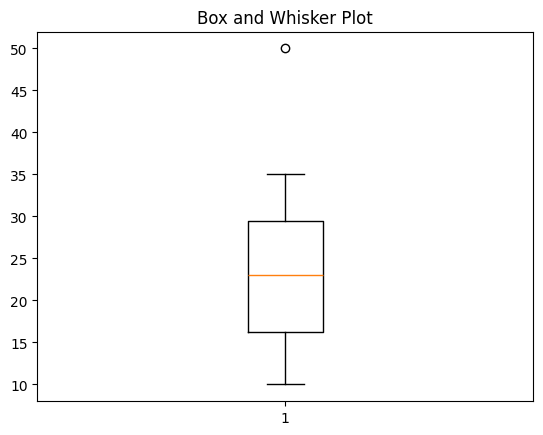

In [22]:
import matplotlib.pyplot as plt
import numpy as np

data = [10, 12, 15, 20, 22, 24, 28, 30, 35, 50]
plt.boxplot(data)
plt.title("Box and Whisker Plot")
plt.show()

### Scatter Plot
- In the plot, the point (8, 30) stands out as an outlier.
- There is a possitive correlation between x and y

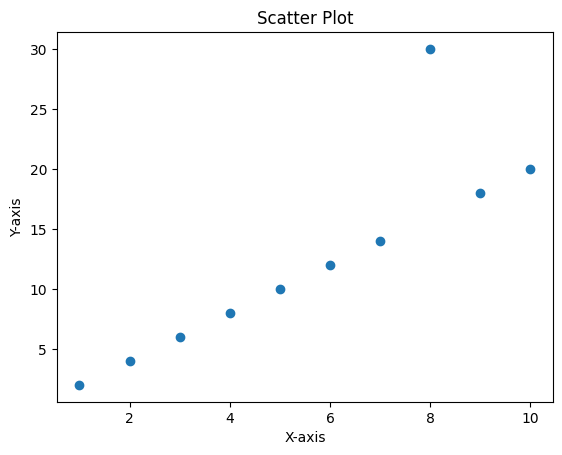

In [26]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2, 4, 6, 8, 10, 12, 14, 30, 18, 20]  # Note the outlier at y=100

plt.scatter(x, y)
plt.title("Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

### Cook's Distance

In [ ]:
import statsmodels.api as sm
import numpy as np

# Example data
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([1.2, 2.3, 2.9, 4.1, 5.0, 6.2, 7.1, 8.5, 50.0])  # Note the outlier

# Fit regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
influence = model.get_influence()

# Calculate Cook's Distance
cooks_d = influence.cooks_distance[0]
print("Cook's Distance:", cooks_d)

#In this example, the Cook's Distance for the outlier (y=50.0) will be significantly higher than for other points.

Cook's Distance: [1.37719060e-01 2.35904728e-02 4.08064768e-04 1.97281046e-03
 1.05278268e-02 2.98235045e-02 9.04926524e-02 2.49827941e-01
 2.12455295e+00]


## Missing Value treatment

### Identifying Missing Values

In [56]:
import pandas as pd
import numpy as np

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, np.nan, 30, 35],
    'Salary': [50000, 60000, None, 80000]
}
df = pd.DataFrame(data)
print(df)

      Name   Age   Salary
0    Alice  25.0  50000.0
1      Bob   NaN  60000.0
2  Charlie  30.0      NaN
3    David  35.0  80000.0


In [57]:
print(df.notna(),'\n')
print(df.notnull())

   Name    Age  Salary
0  True   True    True
1  True  False    True
2  True   True   False
3  True   True    True 

   Name    Age  Salary
0  True   True    True
1  True  False    True
2  True   True   False
3  True   True    True


### Methods to Handle Missing Values
1. Central Imputation

In [58]:
# Central Imputation Example
df['Age_mean_imputed'] = df['Age'].fillna(df['Age'].mean())
df['Salary_median_imputed'] = df['Salary'].fillna(df['Salary'].median())
print(df)

      Name   Age   Salary  Age_mean_imputed  Salary_median_imputed
0    Alice  25.0  50000.0              25.0                50000.0
1      Bob   NaN  60000.0              30.0                60000.0
2  Charlie  30.0      NaN              30.0                60000.0
3    David  35.0  80000.0              35.0                80000.0


2. KNN Imputation

In [59]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df_knn_imputed = pd.DataFrame(imputer.fit_transform(df[['Age', 'Salary']]), columns=['Age', 'Salary'])
print(df_knn_imputed)

    Age   Salary
0  25.0  50000.0
1  30.0  60000.0
2  30.0  65000.0
3  35.0  80000.0


3. Dummification

In [61]:
# Adding dummy variables for missing values
df['Age_missing'] = df['Age'].isnull().astype(int)
df

,Name,Age,Salary,Age_mean_imputed,Salary_median_imputed,Age_missing
0,Alice,25.0,50000.0,25.0,50000.0,0
1,Bob,NaN,60000.0,30.0,60000.0,1
2,Charlie,30.0,NaN,30.0,60000.0,0
3,David,35.0,80000.0,35.0,80000.0,0


### Visualizing Missing Values

Heatmap Example

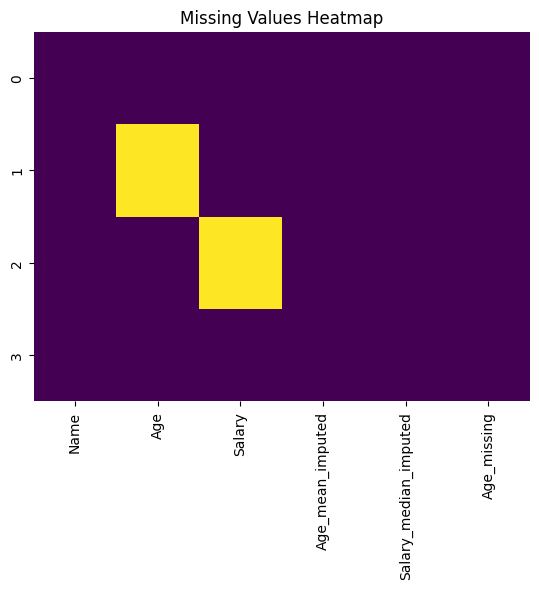

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

## Correlation

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = {
    "Study_Hours": [1, 2, 3, 4, 5],
    "Exam_Score": [50, 55, 65, 70, 80],
    "Social_Media_Hours": [5, 4, 3, 2, 1]
}
df = pd.DataFrame(data)
print(df)

   Study_Hours  Exam_Score  Social_Media_Hours
0            1          50                   5
1            2          55                   4
2            3          65                   3
3            4          70                   2
4            5          80                   1


#### Pearson Correlation

In [65]:
# Pearson Correlation
corr_matrix = df.corr()
print(corr_matrix)

                    Study_Hours  Exam_Score  Social_Media_Hours
Study_Hours            1.000000    0.993399           -1.000000
Exam_Score             0.993399    1.000000           -0.993399
Social_Media_Hours    -1.000000   -0.993399            1.000000


#### Visualization

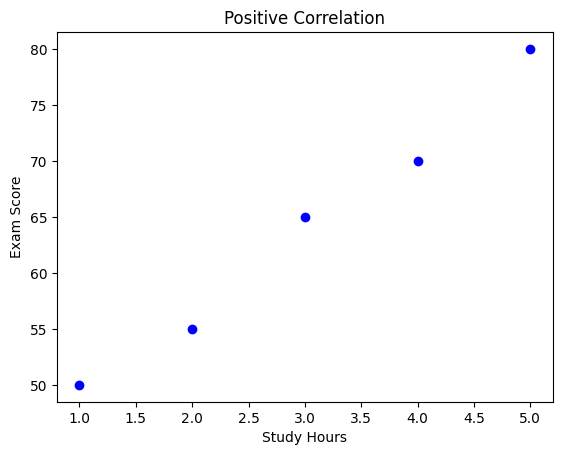

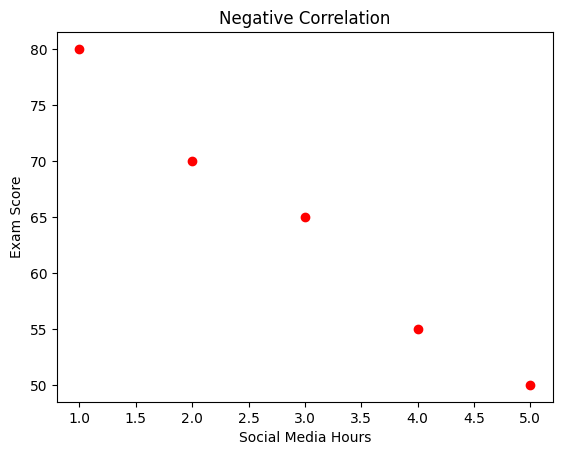

The correlation matrix provides the correlation coefficients between variables. Scatter plots visually demonstrate the trends.


In [67]:
# Scatter plot: Study Hours vs Exam Score
plt.scatter(df['Study_Hours'], df['Exam_Score'], color='blue')
plt.title("Positive Correlation")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

# Scatter plot: Social Media Hours vs Exam Score
plt.scatter(df['Social_Media_Hours'], df['Exam_Score'], color='red')
plt.title("Negative Correlation")
plt.xlabel("Social Media Hours")
plt.ylabel("Exam Score")
plt.show()
print("The correlation matrix provides the correlation coefficients between variables. Scatter plots visually demonstrate the trends.")

#### Spearman Correlation

In [68]:
from scipy.stats import spearmanr

# Spearman Correlation
spearman_corr, _ = spearmanr(df['Study_Hours'], df['Exam_Score'])
print(f"Spearman Correlation: {spearman_corr}")

Spearman Correlation: 0.9999999999999999


## Inferential Statistics

### Probability Distributions

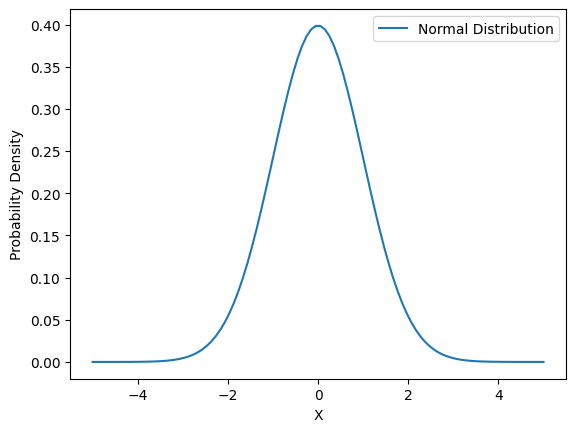

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu, sigma = 0, 1  # Mean and Standard Deviation
x = np.linspace(-5, 5, 100)
y = norm.pdf(x, mu, sigma)

plt.plot(x, y, label="Normal Distribution")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

### T test

In [4]:
from scipy.stats import ttest_ind

group1 = np.random.normal(50, 10, 100)
group2 = np.random.normal(55, 10, 100)

t_stat, p_value = ttest_ind(group1, group2)
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

T-Statistic: -1.8022, P-Value: 0.0730


### Chi-Square Test

In [5]:
from scipy.stats import chi2_contingency

data = [[10, 20, 30], [6, 9, 17]]
chi2, p, dof, expected = chi2_contingency(data)
print(f"Chi-Square: {chi2:.4f}, P-Value: {p:.4f}")

Chi-Square: 0.2716, P-Value: 0.8730


### ANOVA (Analysis of Variance)

In [6]:
from scipy.stats import f_oneway

g1 = np.random.normal(50, 10, 100)
g2 = np.random.normal(55, 10, 100)
g3 = np.random.normal(60, 10, 100)

f_stat, p_value = f_oneway(g1, g2, g3)
print(f"F-Statistic: {f_stat:.4f}, P-Value: {p_value:.4f}")

F-Statistic: 21.5989, P-Value: 0.0000


### Hypothesis testing example

#### Hypothesis Testing
##### Null and Alternative Hypotheses
* Null Hypothesis (H0): Assumes no effect or relationship exists.
* Alternative Hypothesis (Ha): Assumes an effect or relationship exists.

Example:
* H0: The new drug has no effect on pain relief.
* Ha: The new drug reduces pain significantly.

##### P-Value
The p-value measures the strength of evidence against the null hypothesis.
* If p<α (e.g., 0.05), reject H0.
* If p≥α, fail to reject H0.

### One-Sample t-Test with hypothesis testing

One-Sample t-Test Results
-------------------------
Sample Mean: 73.12
t-Statistic: 1.8979
p-Value: 0.0677


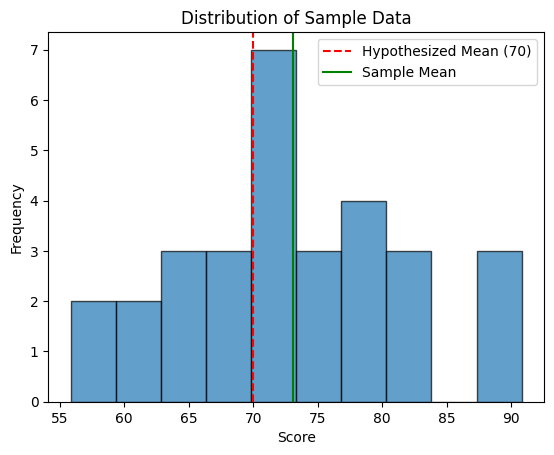

In [22]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Simulated sample data: e.g., student test scores
np.random.seed(42)
sample_data = np.random.normal(loc=75, scale=10, size=30)  # mean=75, std=10, n=30

# Hypothesized population mean (e.g., 70)
mu_0 = 70

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(sample_data, mu_0)

print("One-Sample t-Test Results")
print("-------------------------")
print(f"Sample Mean: {np.mean(sample_data):.2f}")
print(f"t-Statistic: {t_statistic:.4f}")
print(f"p-Value: {p_value:.4f}")

# Visualization: Plotting the sample data distribution
plt.hist(sample_data, bins=10, edgecolor='k', alpha=0.7)
plt.axvline(mu_0, color='red', linestyle='--', label='Hypothesized Mean (70)')
plt.axvline(np.mean(sample_data), color='green', linestyle='-', label='Sample Mean')
plt.title("Distribution of Sample Data")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [23]:
alpha = 0.05
if p_value > alpha: 
    print("We fail to reject null hypothesis ie., we accept null hypothesis")

We fail to reject null hypothesis ie., we accept null hypothesis


#### Step-by-Step Interpretation
##### State the Hypotheses
* Null Hypothesis (𝐻0): The true mean is 70 (μ=70).
* Alternative Hypothesis (𝐻𝑎): The true mean is not 70 (𝜇≠70).
##### Compare the p-Value with 𝛼
* The p-value (0.0677) is greater than the standard significance level (α=0.05).
* Since p > 0.05, we fail to reject the null hypothesis.
##### Conclusion
* There is not enough statistical evidence to conclude that the sample mean (73.12) is significantly different from the hypothesized population mean (70).
* While the sample mean is slightly higher, the difference could be due to random variation rather than a true effect.
##### Additional Considerations
* If we had set a higher α (e.g., 0.10), the result would be borderline significant, meaning we might reconsider rejecting 𝐻0.

### Two-Sample t-Test

Two-Sample t-Test Results
-------------------------
Group 1 Mean: 74.17
Group 2 Mean: 81.15
t-Statistic: -2.6988
p-Value: 0.0085


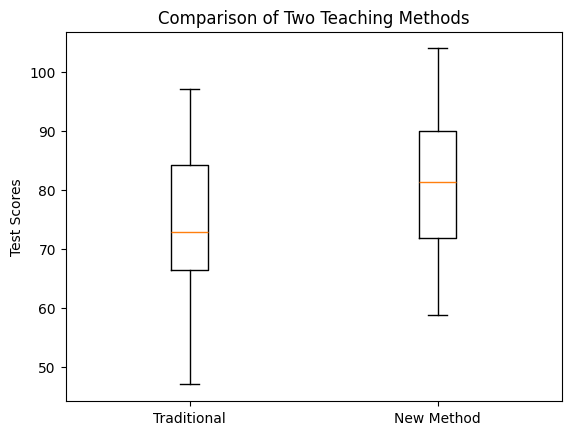

In [18]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Simulated data for two groups (e.g., scores from two different teaching methods)
np.random.seed(123)
group1 = np.random.normal(loc=75, scale=10, size=40)  # Group 1: traditional method
group2 = np.random.normal(loc=80, scale=10, size=40)  # Group 2: new method

# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

print("Two-Sample t-Test Results")
print("-------------------------")
print(f"Group 1 Mean: {np.mean(group1):.2f}")
print(f"Group 2 Mean: {np.mean(group2):.2f}")
print(f"t-Statistic: {t_statistic:.4f}")
print(f"p-Value: {p_value:.4f}")

# Visualization: Boxplot to compare the two groups
plt.boxplot([group1, group2], labels=['Traditional', 'New Method'])
plt.title("Comparison of Two Teaching Methods")
plt.ylabel("Test Scores")
plt.show()

There is strong statistical evidence that the means of Group 1 and Group 2 are significantly different. Since Group 2 has a higher mean (81.15 vs. 74.17), this suggests that Group 2 performs better than Group 1. The difference is unlikely to be due to random variation, as the p-value is much lower than 0.05

###  ANOVA (Analysis of Variance)

In [20]:
from scipy.stats import f_oneway

# Three groups
group1 = [10, 12, 14]
group2 = [15, 17, 19]
group3 = [20, 22, 24]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(group1, group2, group3)
print(f"F-statistic: {f_statistic}, P-value: {p_value}")

F-statistic: 18.75, P-value: 0.002624133830825372


### Chi-Square Test of Independence
**Scenario:**

A researcher wants to determine if gender (male/female) is associated with preference for a product (yes/no).

	    Prefer Product	    Do Not Prefer Product	    Total
Male	    30	                      20	              50
Female	    40	                      10	              50
Total	    70	                      30	             100

In [24]:
import numpy as np
from scipy.stats import chi2_contingency

# Observed data
data = np.array([[30, 20], [40, 10]])  # Rows: Male/Female, Columns: Prefer/Not Prefer

# Perform chi-square test
chi2_statistic, p_value, dof, expected = chi2_contingency(data)

print(f"Chi-Square Statistic: {chi2_statistic}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: A significant relationship exists.")
else:
    print("Fail to reject the null hypothesis: No significant relationship.")

Chi-Square Statistic: 3.8571428571428577
P-value: 0.04953461343562649
Degrees of Freedom: 1
Expected Frequencies:
[[35. 15.]
 [35. 15.]]
Reject the null hypothesis: A significant relationship exists.
